In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## cleaning data

In [4]:
azure_ads = pd.read_csv("/Users/wu/Desktop/Intern/data analysis/azure_ads.csv")

In [5]:
print(azure_ads)

         Unnamed: 0     user  time_stamp  adgroup_id          pid  nonclk  clk
0                 0   581738  1494137644           1  430548_1007       1    0
1                 1   449818  1494638778           3  430548_1007       1    0
2                 2   914836  1494650879           4  430548_1007       1    0
3                 3   914836  1494651029           5  430548_1007       1    0
4                 4   399907  1494302958           8  430548_1007       1    0
...             ...      ...         ...         ...          ...     ...  ...
1048570     1048570   909675  1494666964      183390  430548_1007       1    0
1048571     1048571   708716  1494582327      183390  430548_1007       1    0
1048572     1048572   576466  1494313024      183390  430548_1007       1    0
1048573     1048573  1037392  1494680974      183390  430548_1007       1    0
1048574     1048574   695789  1494572481      183390  430548_1007       1    0

[1048575 rows x 7 columns]


In [6]:
data = azure_ads.sample(n=1000000)

In [7]:
print(data)

        Unnamed: 0     user  time_stamp  adgroup_id          pid  nonclk  clk
146995      146995   874596  1494340376       37432  430548_1007       1    0
532794      532794   364252  1494293812      109054  430539_1007       1    0
403546      403546     7852  1494392909       89588  430539_1007       1    0
333922      333922   738085  1494040336       74885  430539_1007       1    0
642823      642823   287917  1494682289      123876  430539_1007       1    0
...            ...      ...         ...         ...          ...     ...  ...
553232      553232   803965  1494286927      112010  430539_1007       0    1
548611      548611   224198  1494203437      111402  430548_1007       0    1
64433        64433   449086  1494346403       17810  430548_1007       1    0
16835        16835   117635  1494023877        4887  430548_1007       1    0
460048      460048  1091993  1494477218       99054  430539_1007       1    0

[1000000 rows x 7 columns]


In [8]:
data.dropna(axis=0)

,Unnamed: 0,user,time_stamp,adgroup_id,pid,nonclk,clk
146995,146995,874596,1494340376,37432,430548_1007,1,0
532794,532794,364252,1494293812,109054,430539_1007,1,0
403546,403546,7852,1494392909,89588,430539_1007,1,0
333922,333922,738085,1494040336,74885,430539_1007,1,0
642823,642823,287917,1494682289,123876,430539_1007,1,0
...,...,...,...,...,...,...,...
553232,553232,803965,1494286927,112010,430539_1007,0,1
548611,548611,224198,1494203437,111402,430548_1007,0,1
64433,64433,449086,1494346403,17810,430548_1007,1,0
16835,16835,117635,1494023877,4887,430548_1007,1,0


In [9]:
data.drop_duplicates()

,Unnamed: 0,user,time_stamp,adgroup_id,pid,nonclk,clk
146995,146995,874596,1494340376,37432,430548_1007,1,0
532794,532794,364252,1494293812,109054,430539_1007,1,0
403546,403546,7852,1494392909,89588,430539_1007,1,0
333922,333922,738085,1494040336,74885,430539_1007,1,0
642823,642823,287917,1494682289,123876,430539_1007,1,0
...,...,...,...,...,...,...,...
553232,553232,803965,1494286927,112010,430539_1007,0,1
548611,548611,224198,1494203437,111402,430548_1007,0,1
64433,64433,449086,1494346403,17810,430548_1007,1,0
16835,16835,117635,1494023877,4887,430548_1007,1,0


## Analysis By Pid

In [10]:
group = data.groupby('pid').sum()

In [11]:
print(group)

               Unnamed: 0          user       time_stamp   adgroup_id  nonclk  \
pid                                                                             
430539_1007  195285854105  219184841561  548025752893917  37885007822  348280   
430548_1007  329064514502  359113033029  946328534431335  64105601343  602209   

               clk  
pid                 
430539_1007  18451  
430548_1007  31060  


In [12]:
group['rate'] = (group['clk']) / ((group['clk']) + (group['nonclk']))

In [13]:
group = group.reset_index()

In [14]:
group

,pid,Unnamed: 0,user,time_stamp,adgroup_id,nonclk,clk,rate
0,430539_1007,195285854105,219184841561,548025752893917,37885007822,348280,18451,0.050312
1,430548_1007,329064514502,359113033029,946328534431335,64105601343,602209,31060,0.049047


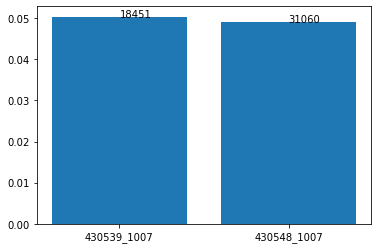

In [15]:
plt.bar(group['pid'],group['rate'])
for a in range(0,2) :
    plt.text(group['pid'][a],group['rate'][a],group['clk'][a])

Comparing this two pid, there is no significant difference.

## Analysis By Age & Gender

In [18]:
user_profile = pd.read_csv("/Users/wu/Desktop/Intern/data analysis/user_profile.csv")

In [19]:
print(user_profile)

         Unnamed: 0  userid  gender  age_level  pvalue_level  occupation
0                 0     234       2          5           NaN           0
1                 1     523       2          2           1.0           1
2                 2     612       1          2           2.0           0
3                 3    1670       2          4           NaN           0
4                 4    2545       1          4           NaN           0
...             ...     ...     ...        ...           ...         ...
1048570     1048570  272699       2          4           2.0           0
1048571     1048571  273113       1          5           NaN           0
1048572     1048572  273589       2          4           NaN           0
1048573     1048573  273943       2          4           NaN           0
1048574     1048574  274358       2          5           NaN           0

[1048575 rows x 6 columns]


In [20]:
user_profile.rename(columns={'userid':'user'},inplace=True)

In [21]:
merge = pd.merge(data,user_profile, on = ["user"], how = "left")

In [22]:
print(merge)

        Unnamed: 0_x     user  time_stamp  adgroup_id          pid  nonclk  \
0             146995   874596  1494340376       37432  430548_1007       1   
1             532794   364252  1494293812      109054  430539_1007       1   
2             403546     7852  1494392909       89588  430539_1007       1   
3             333922   738085  1494040336       74885  430539_1007       1   
4             642823   287917  1494682289      123876  430539_1007       1   
...              ...      ...         ...         ...          ...     ...   
999995        553232   803965  1494286927      112010  430539_1007       0   
999996        548611   224198  1494203437      111402  430548_1007       0   
999997         64433   449086  1494346403       17810  430548_1007       1   
999998         16835   117635  1494023877        4887  430548_1007       1   
999999        460048  1091993  1494477218       99054  430539_1007       1   

        clk  Unnamed: 0_y  gender  age_level  pvalue_level  occ

In [23]:
merge = merge.dropna(axis=0)

In [24]:
merge.drop_duplicates()

,Unnamed: 0_x,user,time_stamp,adgroup_id,pid,nonclk,clk,Unnamed: 0_y,gender,age_level,pvalue_level,occupation
0,146995,874596,1494340376,37432,430548_1007,1,0,200123.0,2.0,3.0,2.0,0.0
4,642823,287917,1494682289,123876,430539_1007,1,0,318148.0,2.0,5.0,3.0,0.0
7,700073,262110,1494168900,130800,430548_1007,1,0,650701.0,2.0,4.0,2.0,0.0
9,862609,739530,1494215015,155570,430539_1007,1,0,380143.0,2.0,5.0,3.0,0.0
13,537156,201496,1494114934,109580,430548_1007,1,0,145656.0,1.0,4.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999977,936668,993901,1494631069,166961,430539_1007,1,0,836096.0,2.0,3.0,1.0,0.0
999978,102528,332634,1494283016,27356,430539_1007,1,0,881750.0,1.0,5.0,2.0,0.0
999988,285811,480767,1494204513,64319,430539_1007,1,0,399217.0,2.0,2.0,2.0,0.0
999993,552893,236007,1494465834,111951,430548_1007,1,0,900840.0,2.0,2.0,1.0,0.0


In [25]:
age = merge.groupby(['age_level','gender']).sum()

In [26]:
age['rate'] = (age['clk'] / ((age['clk']) + (age['nonclk'])))

In [27]:
age = age.reset_index()

In [28]:
gender1 = []
for i in range(0,14):
    if age.loc[i]['gender'] == 1 :
        gender1.append(age['rate'][i])


In [29]:
gender2 =[]
for i in range(0,14) :
    if age.loc[i]['gender'] == 2 :
        gender2.append(age['rate'][i])

In [30]:
num1 =[]
for i in range(0,14):
    if age.loc[i]['gender'] == 1 :
        num1.append(age['clk'][i])

In [31]:
num2 = []
for i in range(0,14):
    if age.loc[i]['gender'] == 2 :
        num2.append(age['clk'][i])


In [32]:
num2

[2, 429, 2191, 4302, 3659, 2764, 316]

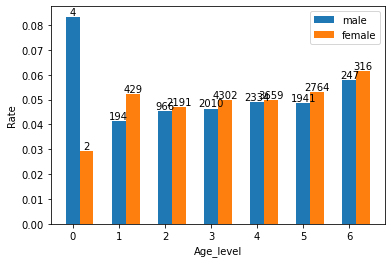

In [33]:
x = np.arange(7)
bar_width = 0.3

plt.bar(x, gender1, bar_width,label = 'male')
plt.bar(x+bar_width, gender2, bar_width, align="center",label='female')

plt.legend()

i = 0
j = 0
for a,b in zip(x,gender1):
    plt.text(a,b,num1[i],ha="center",va= "bottom")
    i += 1

for a,b in zip(x+0.3,gender2):
    plt.text(a,b,num2[j],ha="center",va= "bottom")
    j += 1

plt.xlabel("Age_level")
plt.ylabel("Rate")
plt.show()

Based on the plot, we can conclude that the rate of male in age_level = 0 has the highest rate while the female in this age level has the lowest in this data set. As for the other groups, there was no significant difference in the data. We can appropriately increase the ad placement for men in age_level 0 and decrease the placement for women in age_level 0.

In [34]:
merge['time_stamp'] = pd.to_datetime(merge['time_stamp'],unit='s')

In [545]:
hour = merge

In [549]:
hour['hour'] = hour['time_stamp'].dt.hour

In [550]:
hour = hour.groupby('hour').sum()

In [552]:
hour = hour.reset_index()

In [555]:
hour['rate'] = (hour['clk'] / ((hour['clk']) + (hour['nonclk'])))

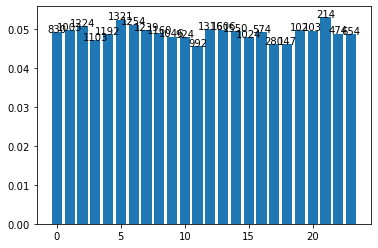

In [557]:
plt.bar(hour['hour'],hour['rate'])
for i in range(0,24):
    plt.text(hour['hour'][i],hour['rate'][i],hour['clk'][i],ha='center')